In [0]:
%matplotlib inline

In [0]:
import tensorflow as tf
sess = tf.InteractiveSession()

In [3]:
import keras
import numpy as np

from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D
from keras.layers import Flatten, Lambda, BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam as Adam
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [0]:
# used to save and load training histories
import pickle
from collections import defaultdict

import resource, sys

In [26]:
!git clone https://github.com/daniarnaizg/text-detector-ocr.git

Cloning into 'text-detector-ocr'...
remote: Counting objects: 32, done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 32 (delta 5), reused 31 (delta 4), pack-reused 0
Unpacking objects: 100% (32/32), done.
Checking out files: 100% (16/16), done.




---



In [0]:
import string
ABC = list(string.ascii_uppercase)
def get_letter(index):
  return ABC[index-1]

EMNIST DATASET

> Downloaded from https://www.nist.gov/itl/iad/image-group/emnist-dataset (Matlab format dataset)



In [5]:
!wget https://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/matlab.zip
!unzip matlab.zip

--2018-05-09 00:39:22--  https://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/matlab.zip
Resolving www.itl.nist.gov (www.itl.nist.gov)... 132.163.4.36, 2610:20:6b01:4::36
Connecting to www.itl.nist.gov (www.itl.nist.gov)|132.163.4.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 743900280 (709M) [application/zip]
Saving to: ‘matlab.zip’

matlab.zip          100%[===================>] 709.44M  65.9MB/s    in 10s     

2018-05-09 00:39:33 (67.7 MB/s) - ‘matlab.zip’ saved [743900280/743900280]

Archive:  matlab.zip
  inflating: matlab/emnist-balanced.mat  
  inflating: matlab/emnist-byclass.mat  
  inflating: matlab/emnist-bymerge.mat  
  inflating: matlab/emnist-digits.mat  
  inflating: matlab/emnist-letters.mat  
  inflating: matlab/emnist-mnist.mat  


In [0]:
from scipy import io as spio
emnist = spio.loadmat("matlab/emnist-letters.mat")

In [0]:
# load training dataset
x_train = emnist["dataset"][0][0][0][0][0][0]
x_train = x_train.astype(np.float32)

# load training labels
y_train = emnist["dataset"][0][0][0][0][0][1]

In [0]:
# load test dataset
x_test = emnist["dataset"][0][0][1][0][0][0]
x_test = x_test.astype(np.float32)

# load test labels
y_test = emnist["dataset"][0][0][1][0][0][1]

In [0]:
# store labels for visualization
train_labels = y_train
test_labels = y_test

In [10]:
x_train.shape

(124800, 784)

In [11]:
y_train.shape

(124800, 1)

In [0]:
# normalize
x_train /= 255
x_test /= 255

In [13]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
# reshape using matlab order
x_train = x_train.reshape(x_train.shape[0], 1, 28, 28, order="A")
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28, order="A")

In [15]:
x_train.shape

(124800, 1, 28, 28)

In [16]:
y_train.shape

(124800, 1)

In [17]:
# labels should be onehot encoded
y_train = keras.utils.to_categorical(y_train, 28)
y_test = keras.utils.to_categorical(y_test, 28)

y_train.shape

(124800, 28)

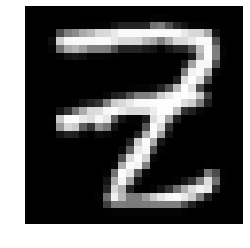

In [42]:
import matplotlib.pyplot as plt
plt.axis('off')

img = x_train[1337]

# visualize image
plt.imshow(img[0], cmap='gray')

In [59]:
# show label for sample image
get_letter(train_labels[1337][0])

'Z'

In [20]:
test_labels.shape

(20800, 1)

In [0]:
test_labels = test_labels.reshape(20800)

In [22]:
test_labels.shape

(20800,)



---



In [0]:
emnist_model_path = 'text-detector-ocr/Models/emnist-model-1.h5'

In [29]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(1,28,28), data_format='channels_first'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(28, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

model.load_weights(emnist_model_path)

# model.fit(x_train, y_train, batch_size=200, epochs=10, verbose=1, validation_data=(x_test, y_test))
# model.save(emnist_model_path)
# files.download('emnist-model-1.h5')

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: ' + str(score[0]))
print('Test accuracy: ' + str(score[1]))

Test loss: 0.21195052719549634
Test accuracy: 0.9314423076923077




---


Test prediccion

In [0]:
img = x_test[2046]
img = np.expand_dims(img, axis=0)
img_class = model.predict_classes(img)
prediction = get_letter(img_class[0])

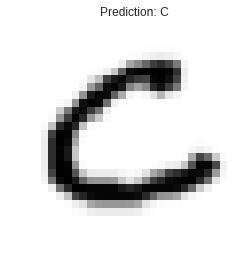

In [65]:
img = img.reshape((28,28))
plt.imshow(img)
plt.title("Prediction: " + prediction)
plt.axis('off')
plt.show()